In [1]:
library(dplyr)
library(Seurat)
library(patchwork)
library(stringr)
library(Matrix)
library(R.utils)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.11.0-CAPI-1.17.0 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 1.6-0 
 Polygon checking: TRUE 


Attaching SeuratObject

Attaching sp

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfu

In [2]:
all_dir=list.dirs('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy')
all_dir=str_extract(all_dir,'.*[0-9][0-9][0-9]$')
all_dir=all_dir[-c(1:length(all_dir))[is.na(all_dir)]]
length(all_dir)
all_dir


[1] 8

[1] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_86_LC0613"       
[2] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_87_LC0613"       
[3] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_88_LC0613"       
[4] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_89_LC0613"       
[5] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_90_LC0613"       
[6] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/SZM20230424_MQ277R-301"
[7] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/SZM20230426_MQ277R-320"
[8] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/SZM20230426_MQ277R-376"

In [3]:
for(i in c(1:8)){matrix_dir=all_dir[i]

if(file.exists(paste0(matrix_dir,"/filter_matrix/barcodes.tsv.gz"))){
    #gunzip(paste0(matrix_dir,"/barcodes.tsv.gz"))
    #gunzip(paste0(matrix_dir,"/matrix.mtx.gz"))
    #gunzip(paste0(matrix_dir,"/genes.tsv.gz"))

    barcode.path<-paste0(matrix_dir,"/filter_matrix/barcodes.tsv.gz")
    genes.path<-paste0(matrix_dir,"/filter_matrix/features.tsv.gz")
    matrix.path<-paste0(matrix_dir,"/filter_matrix/matrix.mtx.gz")

    zebrafish.data <- readMM(file = matrix.path) ##mac上不能读压缩文件
    gene.names = read.delim(genes.path,header = FALSE, stringsAsFactors = FALSE)
    barcode.names = read.delim(barcode.path,header = FALSE,stringsAsFactors = FALSE)
    colnames(zebrafish.data) = barcode.names$V1
    rownames(zebrafish.data) = gene.names$V1 ##把示例中的V1改成V2

    # check矩阵
    zebrafish.data[1:6, 1:6] ##check矩阵
    dim(zebrafish.data) ##check矩阵

    scRNA <- CreateSeuratObject(counts = zebrafish.data)

    saveRDS(scRNA,paste0(matrix_dir,'/filter_matrix/counts.rds'))
}}


In [5]:
read_file='aba'
for(i in c(1:8)){
matrix_dir=all_dir[i]
if(file.exists(paste0(matrix_dir,"/filter_matrix/counts.rds"))){
    read_file=c(read_file,(paste0(matrix_dir,"/filter_matrix/counts.rds")))
}}
read_file=read_file[-1]
read_file


[1] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_86_LC0613/filter_matrix/counts.rds"       
[2] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_87_LC0613/filter_matrix/counts.rds"       
[3] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_88_LC0613/filter_matrix/counts.rds"       
[4] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_89_LC0613/filter_matrix/counts.rds"       
[5] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/ssDNA_90_LC0613/filter_matrix/counts.rds"       
[6] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/SZM20230424_MQ277R-301/filter_matrix/counts.rds"
[7] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/SZM20230426_MQ277R-320/filter_matrix/counts.rds"
[8] "/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/SZM20230426_MQ277R-376/filter_matrix/counts.rds"

In [6]:
sceList = lapply(read_file,function(folder){ 
    readRDS(folder)
})

In [11]:
read_file_renew=str_extract(read_file,'1016.*[0-9][0-9][0-9]')
read_file_renew=gsub('1016/from-zmy/','',read_file_renew)
read_file_renew


[1] "ssDNA_86_LC0613"        "ssDNA_87_LC0613"        "ssDNA_88_LC0613"       
[4] "ssDNA_89_LC0613"        "ssDNA_90_LC0613"        "SZM20230424_MQ277R-301"
[7] "SZM20230426_MQ277R-320" "SZM20230426_MQ277R-376"

In [12]:

sce.big <- merge(sceList[[1]], 
                 y = c(sceList[[2]],sceList[[3]],sceList[[4]],sceList[[5]],sceList[[6]],sceList[[7]],sceList[[8]]), 
                 add.cell.ids = read_file_renew,
                 project = "macaca")

table(sce.big$orig.ident)



SeuratProject 
       136095 

In [14]:
head(rownames(sce.big@meta.data))

[1] "ssDNA_86_LC0613_CELL1_N1" "ssDNA_86_LC0613_CELL2_N1"
[3] "ssDNA_86_LC0613_CELL3_N1" "ssDNA_86_LC0613_CELL4_N1"
[5] "ssDNA_86_LC0613_CELL5_N1" "ssDNA_86_LC0613_CELL6_N1"

In [18]:
sce.big@meta.data$group=str_extract(rownames(sce.big@meta.data),'MQ277R-[0-9][0-9][0-9]')
sce.big@meta.data[is.na(sce.big@meta.data$group),]$group=str_extract(rownames(sce.big@meta.data[is.na(sce.big@meta.data$group),]),'[0-9][0-9]_LC[0-9][0-9][0-9][0-9]')





In [19]:
unique(sce.big@meta.data$group)

[1] "86_LC0613"  "87_LC0613"  "88_LC0613"  "89_LC0613"  "90_LC0613" 
[6] "MQ277R-301" "MQ277R-320" "MQ277R-376"

In [20]:
saveRDS(sce.big,'/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/Insular_raw_unfil_1016.rds')




In [29]:
sce.big

An object of class Seurat 
21350 features across 136095 samples within 1 assay 
Active assay: RNA (21350 features, 0 variable features)

In [23]:
seurat=sce.big
#去除 median nfeature <500
df_meta=seurat@meta.data
group_med_feature=df_meta %>% group_by(group)  %>% summarise(med=median(nFeature_RNA))
select_group=group_med_feature[group_med_feature$med > 500,]$group
select_group

[1] "86_LC0613"  "87_LC0613"  "88_LC0613"  "89_LC0613"  "90_LC0613" 
[6] "MQ277R-301" "MQ277R-320" "MQ277R-376"

In [27]:
library(cowplot)
library(ggplot2)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


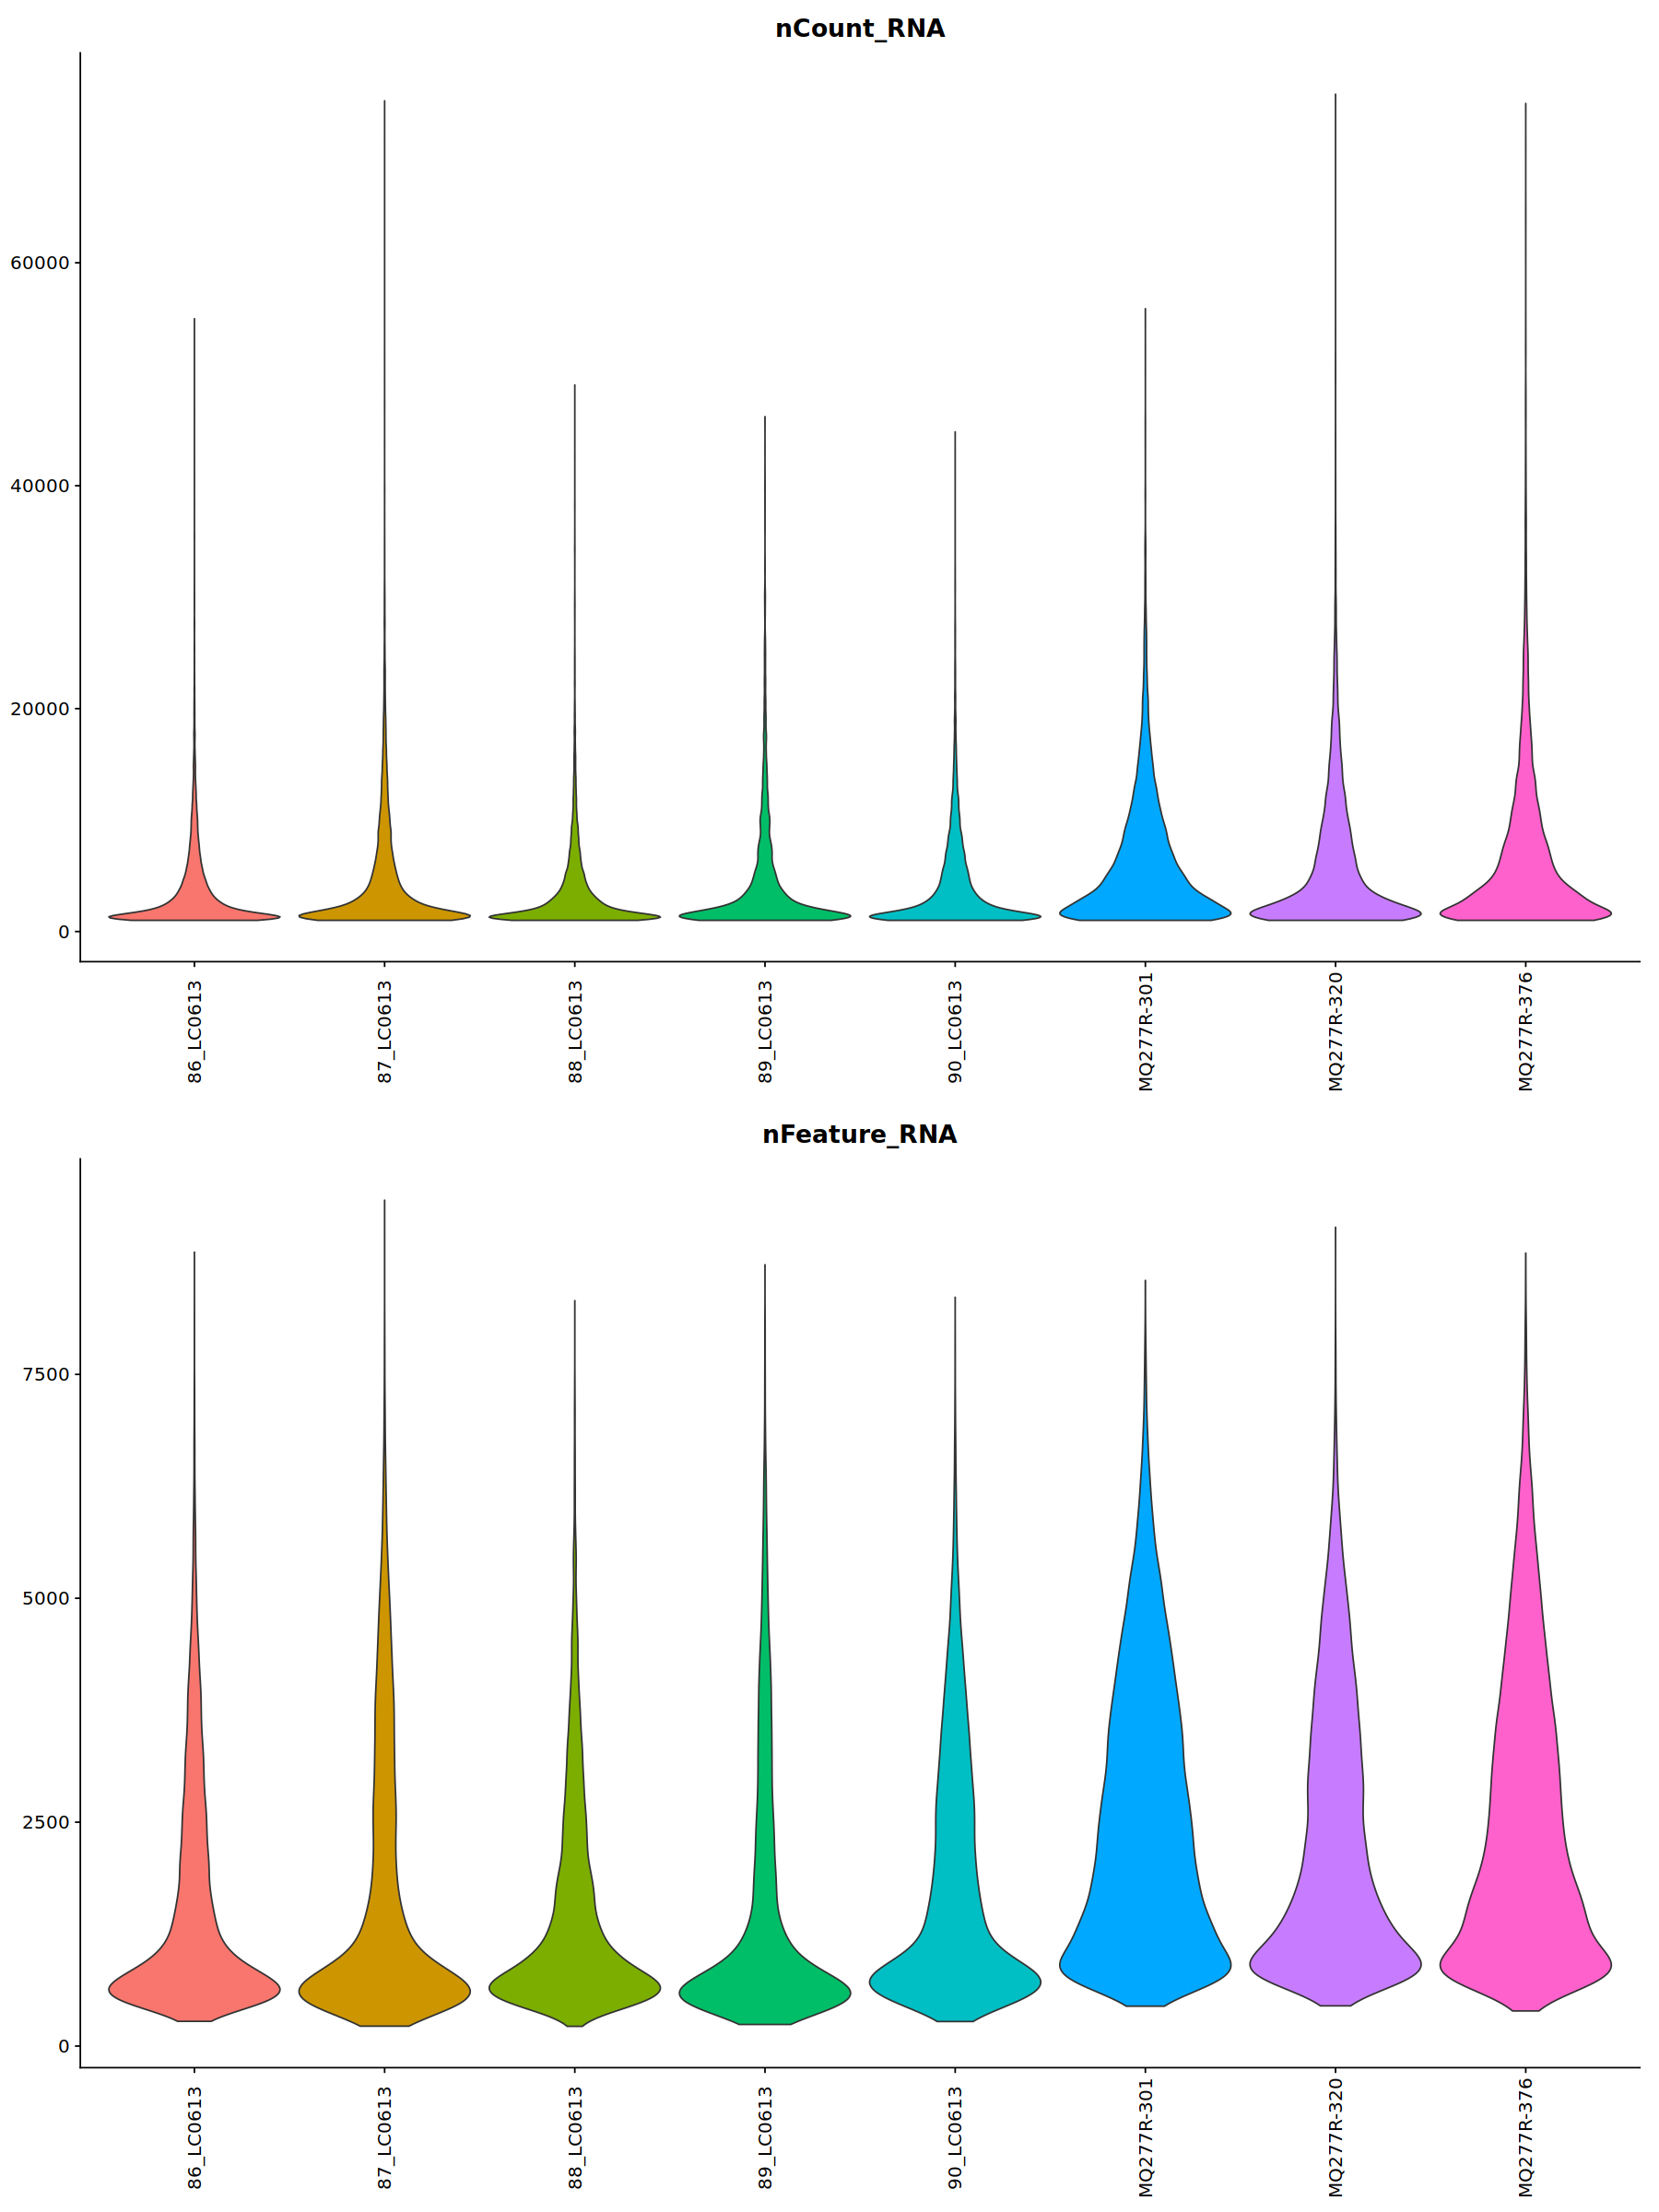

In [28]:
Idents(seurat) = "group"
options(repr.plot.width=15, repr.plot.height=20)
print(plot_grid(
    plotlist = lapply(c("nCount_RNA", "nFeature_RNA"), function(x) {
        p = VlnPlot(seurat, features=x, pt.size=0) + 
            theme(axis.text.x=element_text(vjust=0.5, hjust=0.5, angle=90), axis.title.x = element_blank()) +
            guides(fill=FALSE)
        return(p)
    }), 
    ncol=1, align="hv", axis="tblr"
))

In [30]:
seurat = subset(seurat, nFeature_RNA > 300 )

In [31]:
seurat

An object of class Seurat 
21350 features across 136019 samples within 1 assay 
Active assay: RNA (21350 features, 0 variable features)

In [33]:
saveRDS(seurat,'/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/from-zmy/Insular_nfeature300_1016.rds')

